In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/Zomato-data-.csv


#                                                                                               ZOMATO DATASET

# Importing libraries

In [139]:
import numpy as np 
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [140]:
df = pd.read_csv("/kaggle/input/zomato-dataset/Zomato-data-.csv")

In [141]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


converting rate to numberical ratings

### DROP DUPLICATE ENTRIES

In [143]:
df = df.drop_duplicates(subset=['name'], keep='first')  # Keeps the first occurrence

In [144]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [145]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    109
Cafes      22
Buffet      7
other       7
Name: count, dtype: int64

In [146]:
df['rate'] = df['rate'].map(lambda x: float(x[:-2:]))

In [147]:
(df[df['votes'] == df['votes'].max()]['name'])

38    Empire Restaurant
Name: name, dtype: object

In [148]:
(df[df['rate'] == df['rate'].max()]['name'])

7    Onesta
Name: name, dtype: object

Label encoding the categorical data

In [149]:
le = LabelEncoder()
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])
df['listed_in(type)'] = le.fit_transform(df['listed_in(type)'])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         145 non-null    object 
 1   online_order                 145 non-null    int64  
 2   book_table                   145 non-null    int64  
 3   rate                         145 non-null    float64
 4   votes                        145 non-null    int64  
 5   approx_cost(for two people)  145 non-null    int64  
 6   listed_in(type)              145 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 9.1+ KB


### Univariate Analysis 

<Axes: xlabel='listed_in(type)', ylabel='count'>

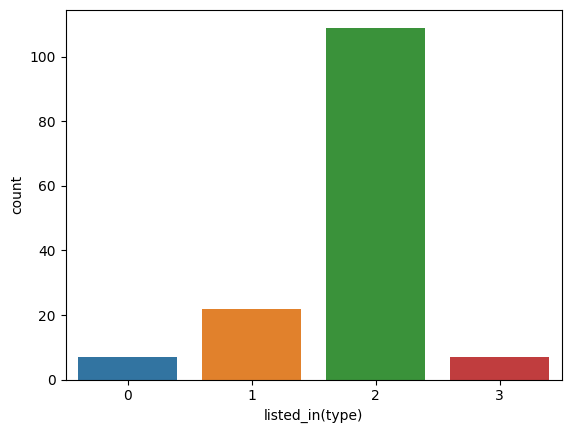

In [151]:
sns.countplot(df, x="listed_in(type)")

<Axes: xlabel='book_table', ylabel='count'>

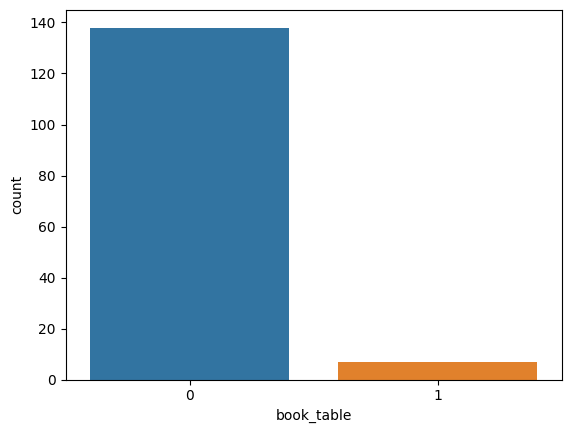

In [152]:
sns.countplot(df, x="book_table")

<Axes: xlabel='online_order', ylabel='count'>

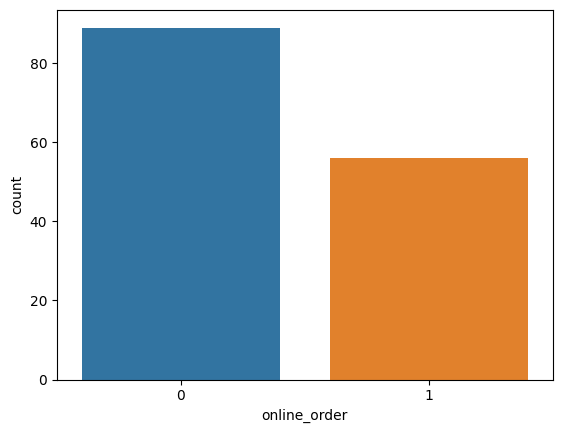

In [153]:
sns.countplot(df, x="online_order")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='votes', ylabel='Density'>

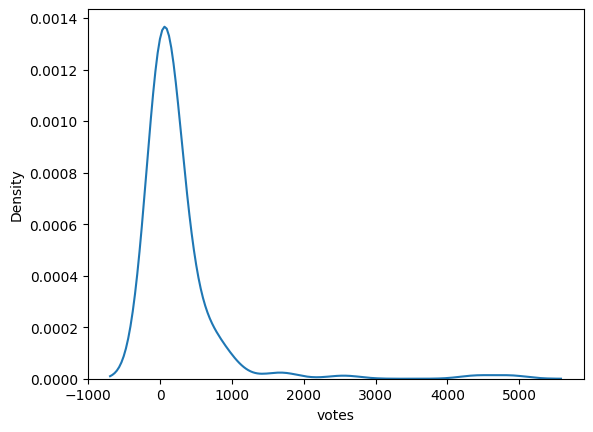

In [154]:
sns.kdeplot(df,x='votes')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

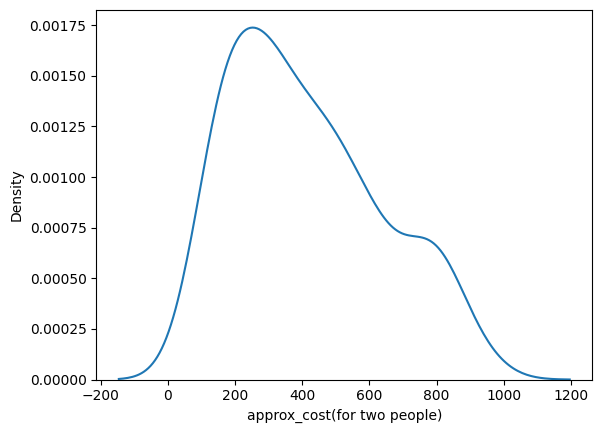

In [155]:
sns.kdeplot(df,x='approx_cost(for two people)')

In [156]:
df.describe()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.386207,0.048276,3.628276,246.255172,413.103448,1.800000
std,0.488567,0.215092,0.396461,629.272086,222.050161,0.596285
min,0.000000,0.000000,2.600000,0.000000,100.000000,0.000000
25%,0.000000,0.000000,3.300000,6.000000,200.000000,2.000000
50%,0.000000,0.000000,3.700000,42.000000,400.000000,2.000000
75%,1.000000,0.000000,3.900000,201.000000,600.000000,2.000000
max,1.000000,1.000000,4.600000,4884.000000,950.000000,3.000000


#### Multivariate Analysis

In [157]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,0
1,Spice Elephant,1,0,4.1,787,800,0
2,San Churro Cafe,1,0,3.8,918,800,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,0
4,Grand Village,0,0,3.8,166,600,0


In [158]:
df = df.drop('name',axis=1)

### CORRELATION MATRIX

<Axes: >

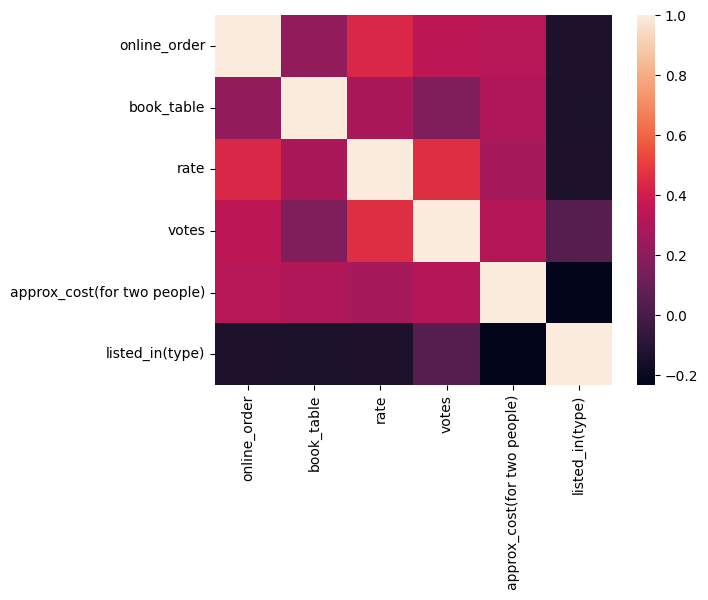

In [159]:
sns.heatmap(df.corr())

<Axes: xlabel='votes', ylabel='approx_cost(for two people)'>

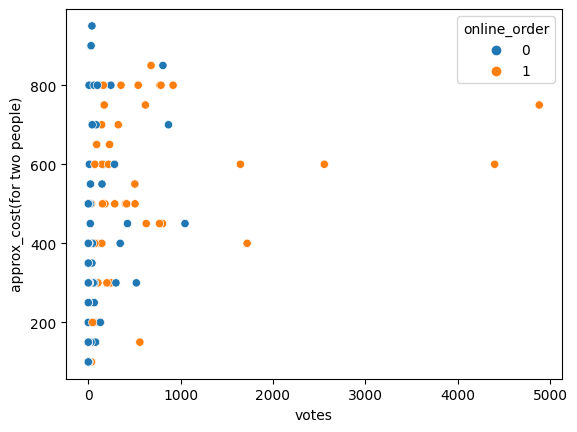

In [160]:
sns.scatterplot(data = df , y='approx_cost(for two people)',x='votes',hue='online_order')

<Axes: xlabel='listed_in(type)', ylabel='votes'>

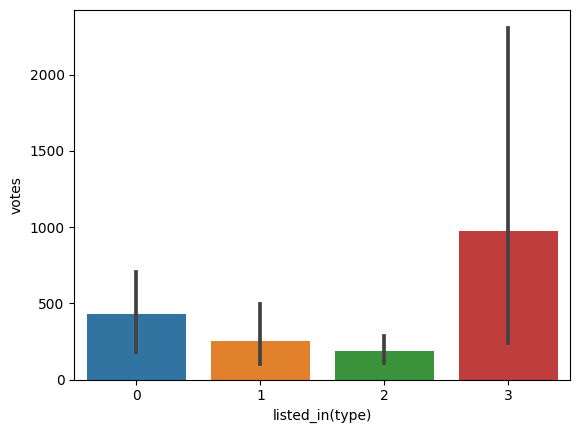

In [161]:
sns.barplot(data = df , y='votes',x='listed_in(type)')

<Axes: xlabel='rate', ylabel='votes'>

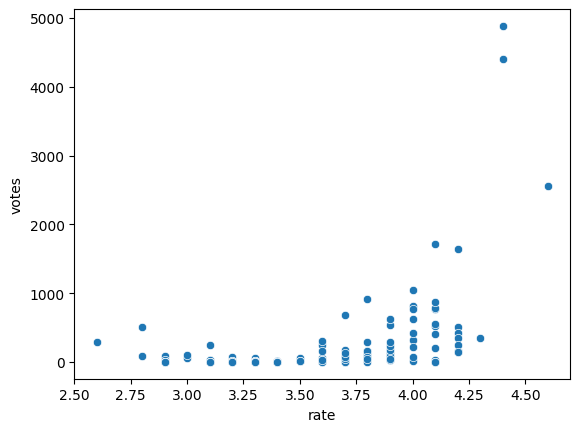

In [162]:
sns.scatterplot(data = df,x='rate',y='votes')

<Axes: xlabel='online_order', ylabel='count'>

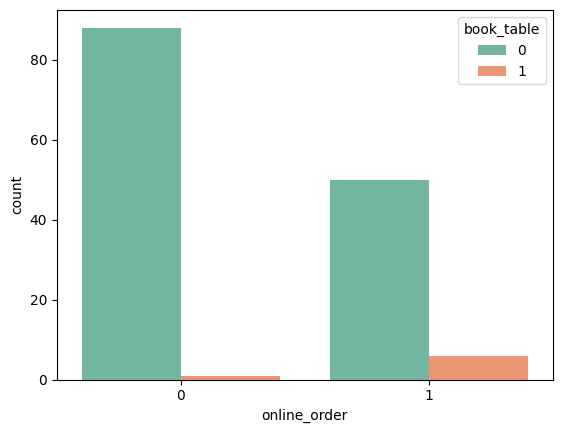

In [163]:
sns.countplot(x=df['online_order'], hue=df['book_table'], palette="Set2")


## Univariate Analysis Insights:
### -> Most of the restaurants are for Dining purpose
### -> Highest Voted Restaurant (possibly highest amount of customers) : Empire Restaurant
### -> Higest rated Restaurant : Onesta
## Votes Distribution:

### -> Some restaurants receive significantly higher votes, while many have low engagement.

##   Approximate Cost Distribution:

###  -> Right-skewed distribution suggests most restaurants have a moderate cost, with a few high-end places.
###  -> Possible price clustering at common values (₹200-₹400).
###  -> Online Order & Table Booking Trends:

###  -> Certain categories have higher acceptance for online orders.
###  -> Some restaurants allow both, while others only allow dine-in.

# Multivariate Analysis Insights:
## Votes vs Online Ordering:

### Restaurants that allow online ordering tend to have more votes than those that don’t.
### This suggests online presence impacts customer engagement.

## Votes vs Table Booking:

### No strong trend—table booking doesn’t significantly affect votes.

## Cost vs Votes:

### Mid-range restaurants tend to have more votes than very expensive or cheap places.
### Suggests customers prefer affordable, popular places over high-end restaurants.

## Correlation Matrix Insights:

### If 'votes' and 'approx_cost(for two people)' are positively correlated, then higher-cost restaurants may attract more engagement.